# Stroke Prediction Project

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (20,20)
#figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

In [2]:
#!pip install pandas-profiling

In [3]:
#!pip install dtale

In [4]:
#from pandas_profiling import ProfileReport

In [5]:
#import dtale

### Import Dataset

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thobelasixpence","key":"475e19ebcf14e6e7a3d7b6a98b3e06a0"}'}

In [7]:
# create a kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
# permission for json files to act
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 51.6MB/s]


In [10]:
!pip install zip_files

In [11]:
from zipfile import ZipFile
# open the zipped file
file_name="stroke-prediction-dataset.zip"
with ZipFile(file_name,'r') as zip:
      zip.extractall()
      print('Done')

Done


In [12]:
df = pd.read_csv(r'/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Explolatory Data Analysis

In [13]:
# get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
# describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [15]:
# dataset shape
df.shape

(5110, 12)

### Univariate Analysis

### Categorical Columns

#### Inspecting Gender Column

In [16]:
import seaborn as sns

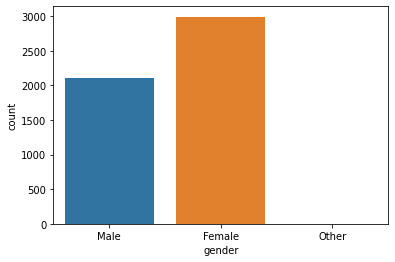

In [17]:
# distribution for Gender
sns.countplot(x = "gender", data= df)
plt.show()

Comments or Findings: 


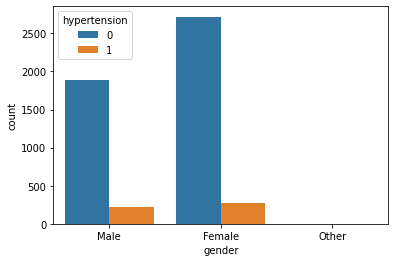

In [18]:
sns.countplot(x ='gender', hue = "hypertension", data = df)
plt.show()

Comments or Findings:
The results above have shown the most gender that has hypertension is female and the most gender that has negative  effect on hypertension is female.

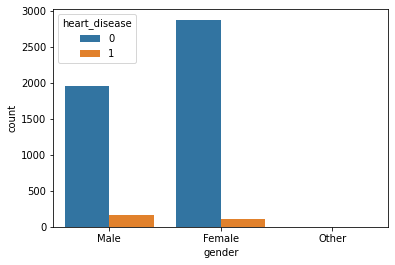

In [19]:
sns.countplot(x ='gender', hue = "heart_disease", data = df)
plt.show()

Comments or Findings: The most gender that has negative results for heart disease is females and the gender is mostly affected by heart disease is male.

#### Inspecting Hyptertension Column

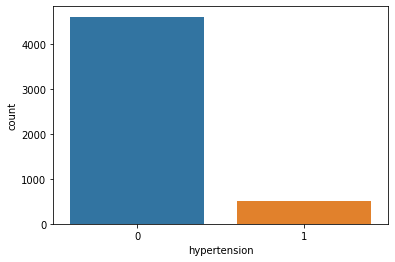

In [20]:
sns.countplot(x = "hypertension", data= df)
plt.show()

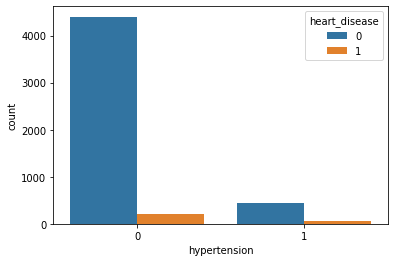

In [21]:
sns.countplot(x ='hypertension', hue = "heart_disease", data = df)
plt.show()

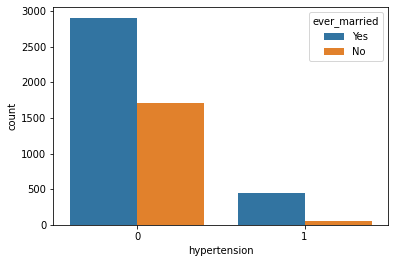

In [22]:
sns.countplot(x ='hypertension', hue = "ever_married", data = df)
plt.show()

#### Inspecting  Heart Disease Column

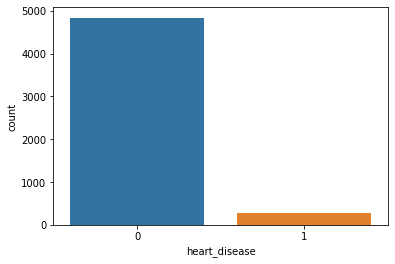

In [23]:
sns.countplot(x = "heart_disease", data= df)
plt.show()

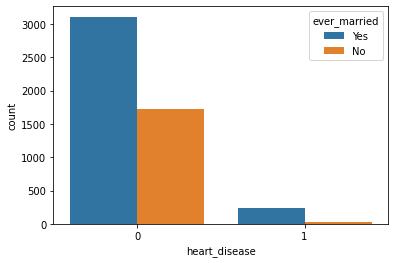

In [24]:
sns.countplot(x ='heart_disease', hue = "ever_married", data = df)
plt.show()

In [25]:
# check for null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Continuous Columns

#### Inspecting Average Glucose Level

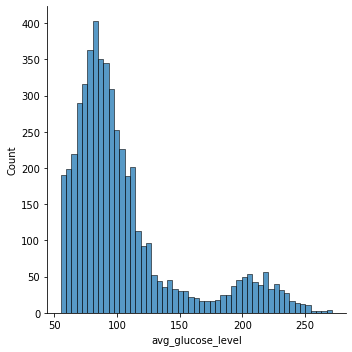

In [26]:
sns.displot(df['avg_glucose_level'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


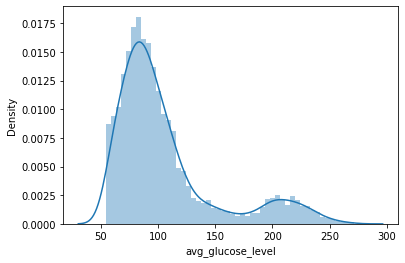

In [27]:
sns.distplot(df['avg_glucose_level'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


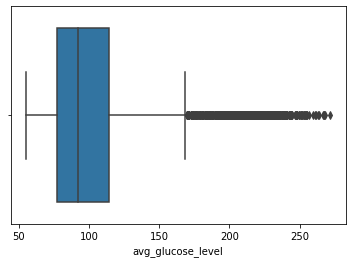

In [28]:
sns.boxplot(df['avg_glucose_level'])
plt.show()

In [29]:
# removee the outliers
def remove_avg_glucose_level_outliers(df):
    # calculate the Quantiles(Q1 and Q3)
    Q1 = df['avg_glucose_level'].quantile(0.25)
    Q3 = df['avg_glucose_level'].quantile(0.75)
    # calclulate the Inter_quatile_range IQR
    IQR = Q3 - Q1
    # calculate the lower limit and upper  limit (LL & UL)
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    # now filter the column to remove the outliers
    # replace all the values that are less or equal to the LL in the hours per weeek column with the LL
    df.loc[df['avg_glucose_level'] <= LL, 'avg_glucose_level'] = LL
    # do the same for values greater than the UL
    df.loc[df['avg_glucose_level'] >= UL, 'avg_glucose_level'] = UL

In [30]:
remove_avg_glucose_level_outliers(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


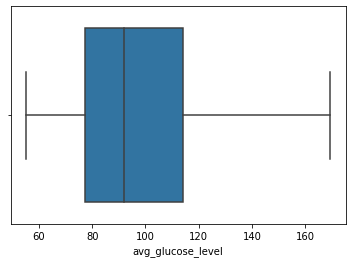

In [31]:
sns.boxplot(df['avg_glucose_level'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


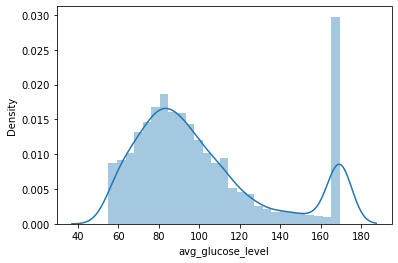

In [32]:
sns.distplot(df['avg_glucose_level'])

Comments & findings : 

#### Inspecting BMI

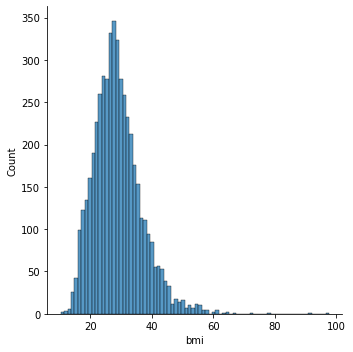

In [33]:
sns.displot(df['bmi'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


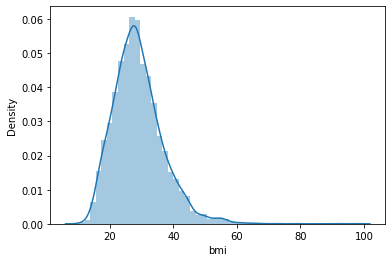

In [34]:
sns.distplot(df['bmi'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


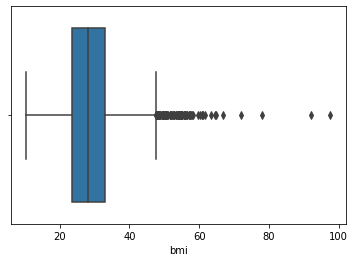

In [35]:
sns.boxplot(df['bmi'])
plt.show()

In [36]:
# removee the outliers
def remove_bmi_outliers(df):
    # calculate the Quantiles(Q1 and Q3)
    Q1 = df['bmi'].quantile(0.25)
    Q3 = df['bmi'].quantile(0.75)
    # calclulate the Inter_quatile_range IQR
    IQR = Q3 - Q1
    # calculate the lower limit and upper  limit (LL & UL)
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    # now filter the column to remove the outliers
    # replace all the values that are less or equal to the LL in the hours per weeek column with the LL
    df.loc[df['bmi'] <= LL, 'bmi'] = LL
    # do the same for values greater than the UL
    df.loc[df['bmi'] >= UL, 'bmi'] = UL

In [37]:
remove_bmi_outliers(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


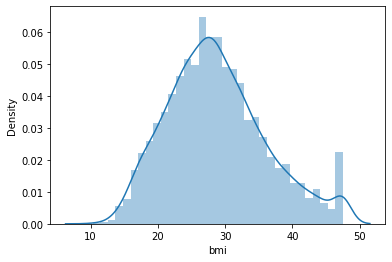

In [38]:
sns.distplot(df['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


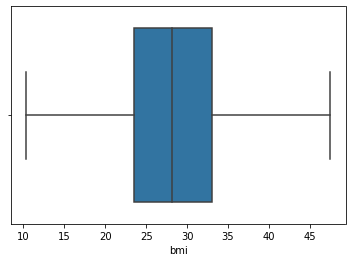

In [39]:
sns.boxplot(df['bmi'])

Comments & findings :

### Bivariate Analysis

#### Continous  Features

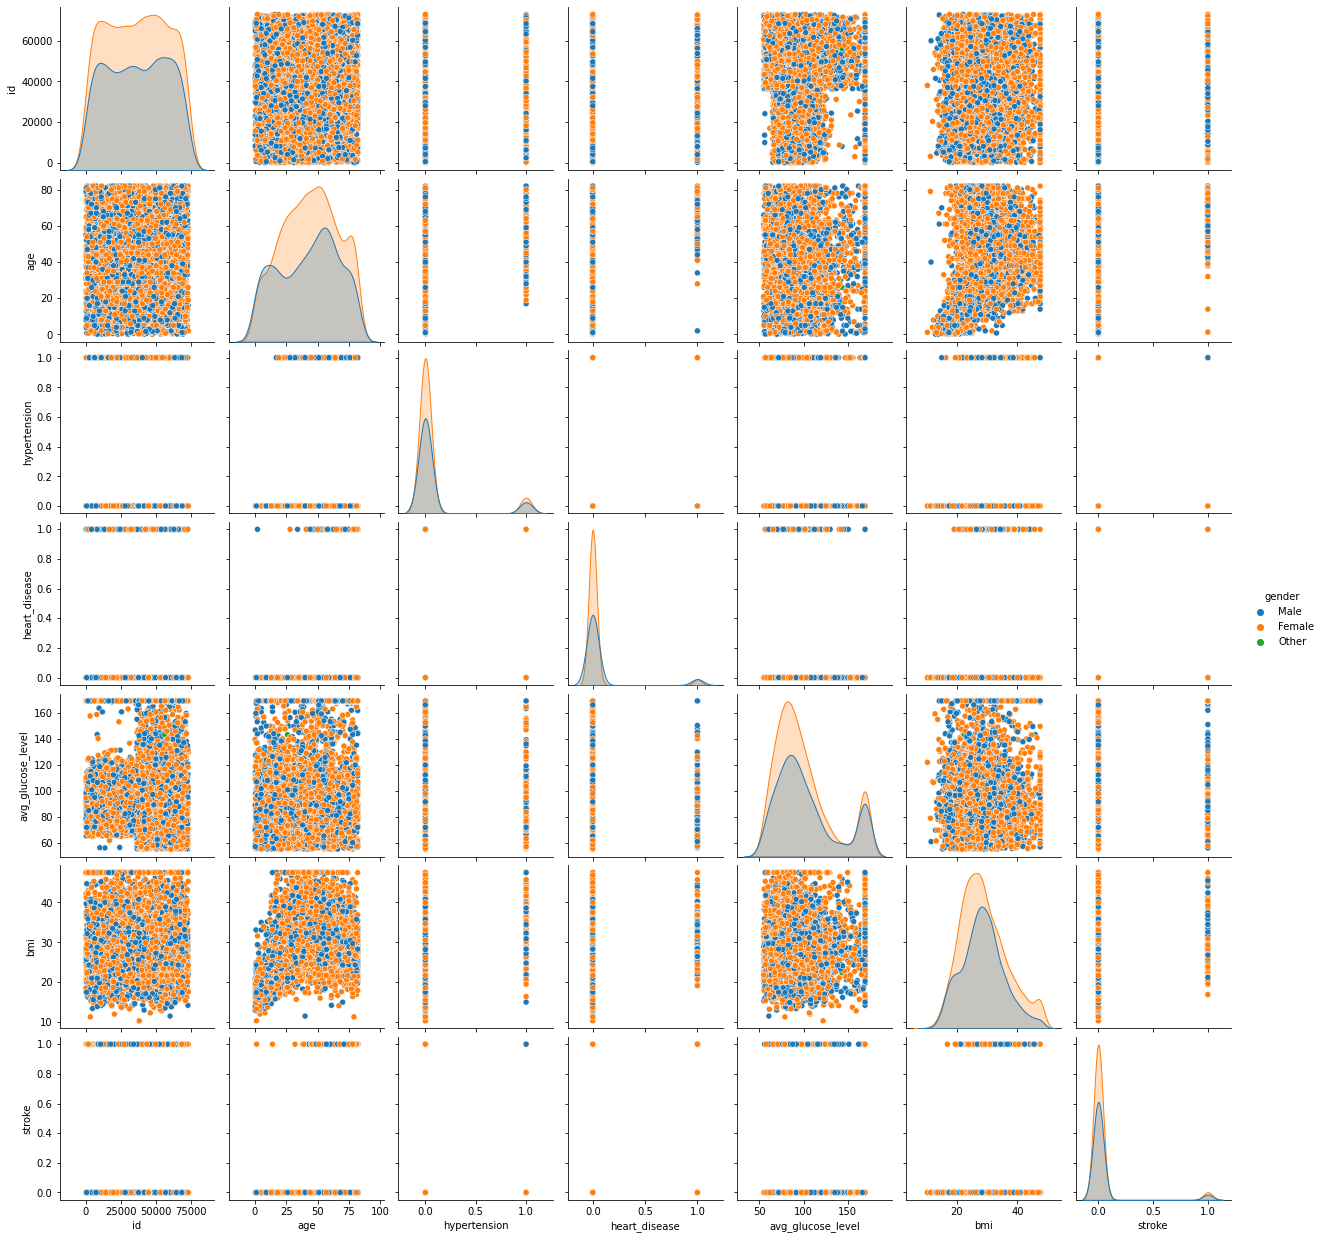

In [40]:
sns.pairplot(df, hue ='gender')
plt.show()


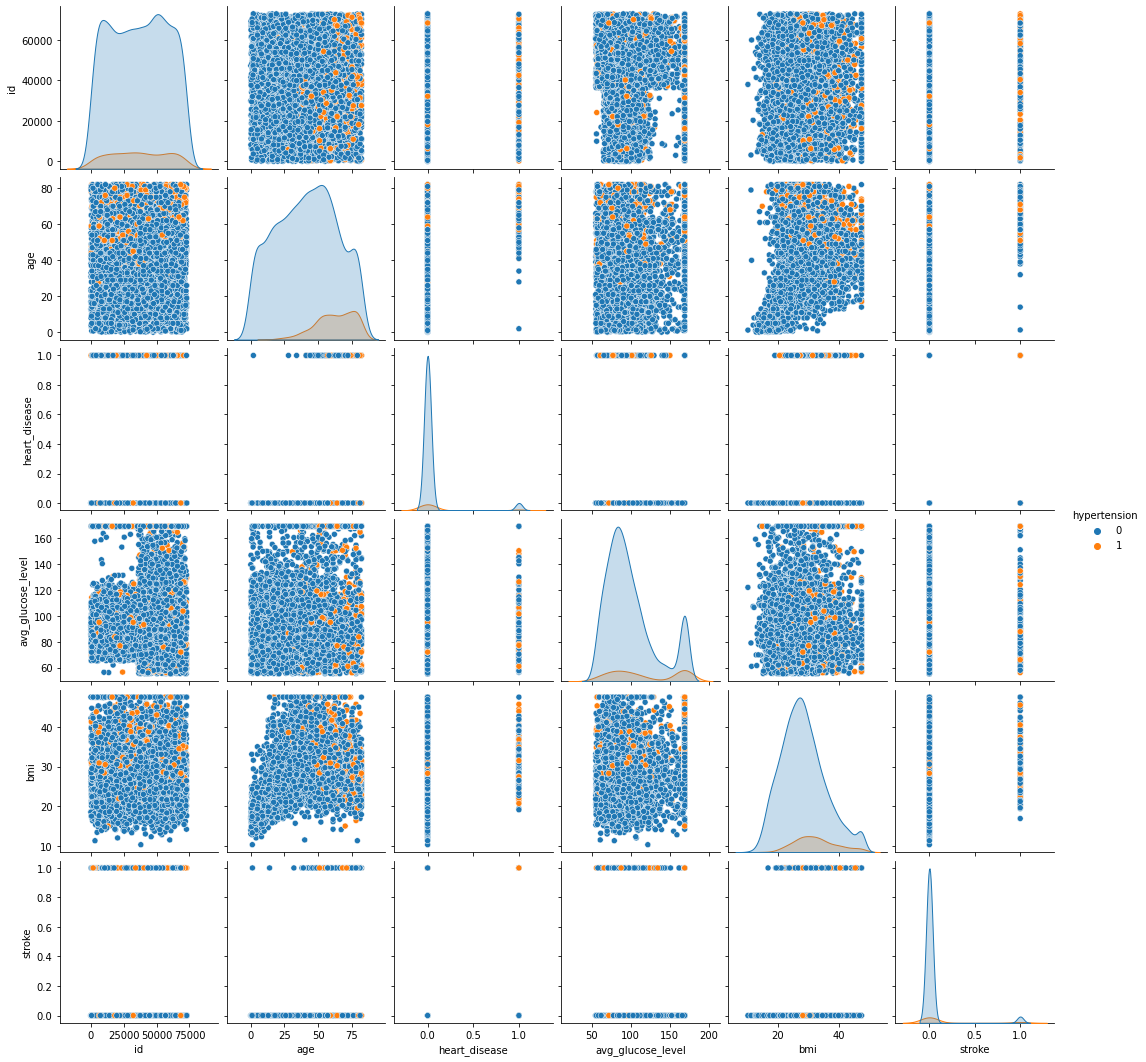

In [41]:
sns.pairplot(df, hue ='hypertension')
plt.show()

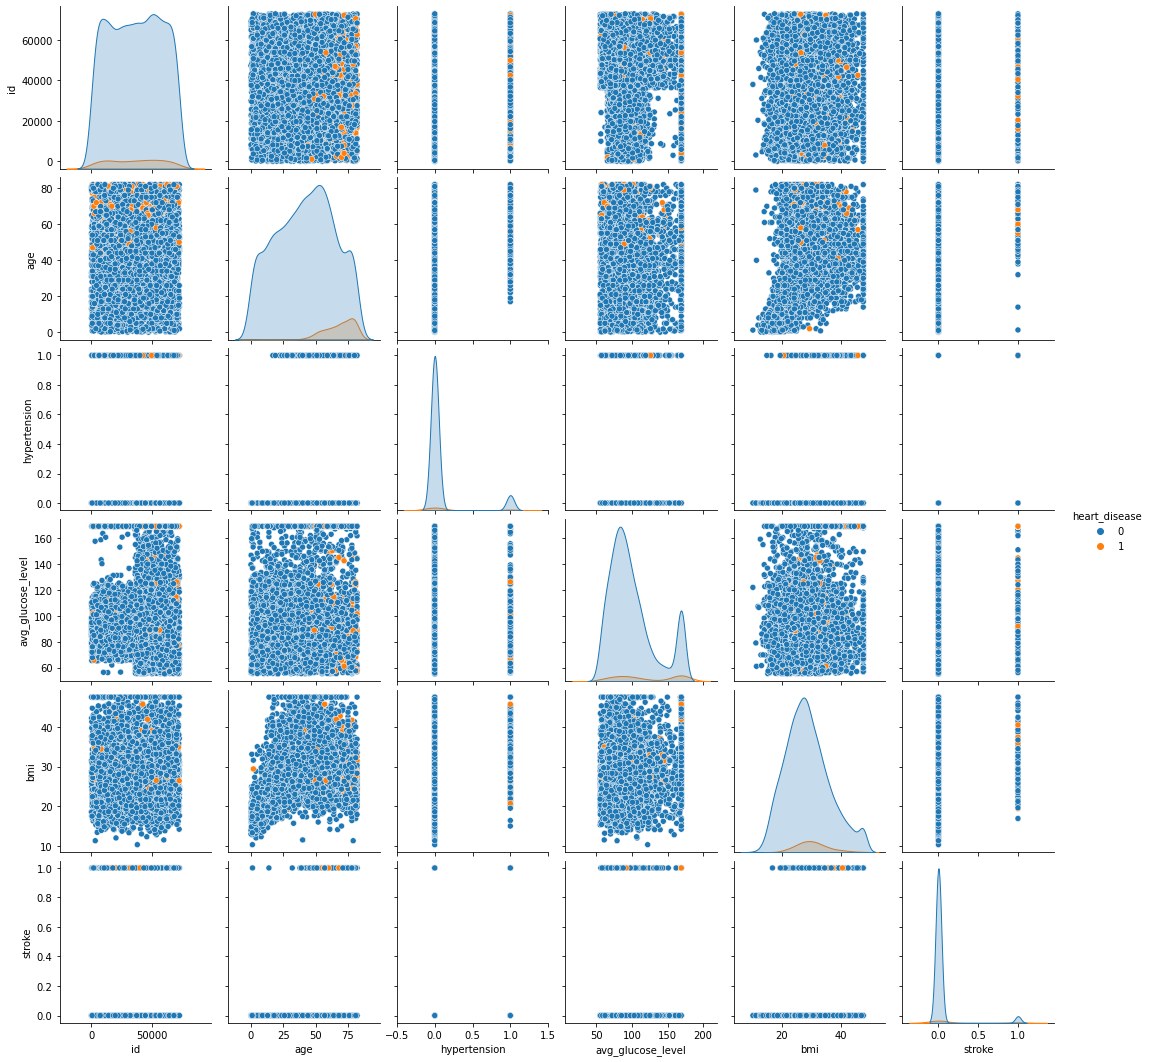

In [42]:
sns.pairplot(df, hue ='heart_disease')
plt.show()

#### Categorical  Features

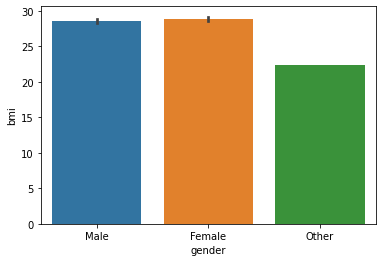

In [43]:
# gender v/s bmi barplot
sns.barplot(x = 'gender',y = 'bmi',data = df)
plt.show()

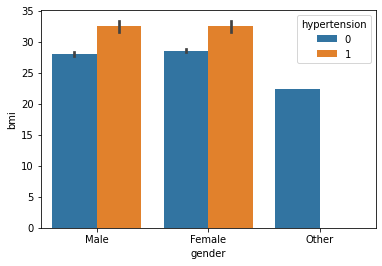

In [44]:

sns.barplot(x = 'gender',y = 'bmi', hue = 'hypertension',data = df)
plt.show()

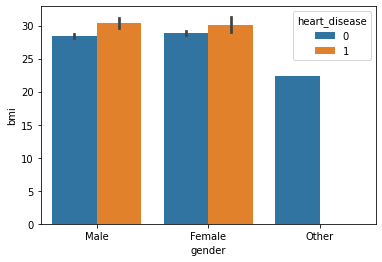

In [45]:
sns.barplot(x = 'gender',y = 'bmi', hue = 'heart_disease',data = df)
plt.show()

## Data Preprocessing

## Feature engineering

### label Encoding

In [46]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

#### gender feature

In [49]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [50]:
gender = le.fit_transform(df['gender'])

In [51]:
df['gender'] = gender

In [52]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,169.3575,NaN,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1


#### Work Type

In [53]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [54]:
work_type = le.fit_transform(df['work_type'])
df['work_type'] = work_type

In [55]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,2,Urban,169.3575,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,3,Rural,169.3575,NaN,never smoked,1
2,31112,1,80.0,0,1,Yes,2,Rural,105.9200,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,2,Urban,169.3575,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,3,Rural,169.3575,24.0,never smoked,1


#### Residence

In [56]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [57]:
res_type = le.fit_transform(df['Residence_type'])
df['Residence_type'] = res_type

In [58]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,2,1,169.3575,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,3,0,169.3575,NaN,never smoked,1
2,31112,1,80.0,0,1,Yes,2,0,105.9200,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,2,1,169.3575,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,3,0,169.3575,24.0,never smoked,1


#### Smoking Type

In [59]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [60]:
smoking_type = le.fit_transform(df['smoking_status'])
df['smoking_status'] = smoking_type
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,2,1,169.3575,36.6,1,1
1,51676,0,61.0,0,0,Yes,3,0,169.3575,NaN,2,1
2,31112,1,80.0,0,1,Yes,2,0,105.9200,32.5,2,1
3,60182,0,49.0,0,0,Yes,2,1,169.3575,34.4,3,1
4,1665,0,79.0,1,0,Yes,3,0,169.3575,24.0,2,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 479.2+ KB


#### Marriage Column

In [62]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,2,1,169.3575,36.6,1,1
1,51676,0,61.0,0,0,Yes,3,0,169.3575,NaN,2,1
2,31112,1,80.0,0,1,Yes,2,0,105.9200,32.5,2,1


In [63]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [64]:
married_ever = le.fit_transform(df['ever_married'])
df['ever_married'] = married_ever
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,169.3575,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,169.3575,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.9200,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,169.3575,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,169.3575,24.0,2,1


### Missing Values

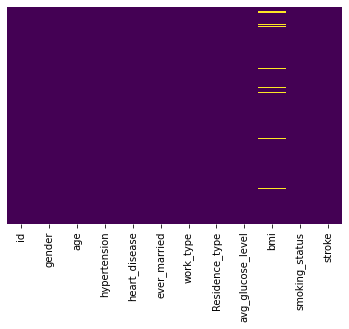

In [65]:
# using heatmap to check null values
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [66]:
df['bmi'].isnull().sum()

201

In [67]:
df['avg_glucose_level'].isnull().sum()

0

In [68]:
# fill the null values for bmi with average value
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

In [69]:
df['bmi'].isnull().sum()

0

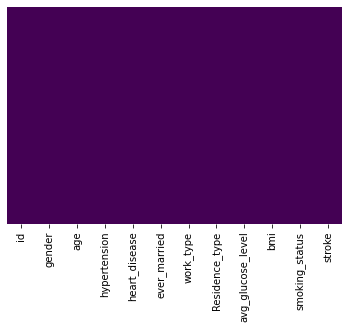

In [70]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

### Outlier Detection

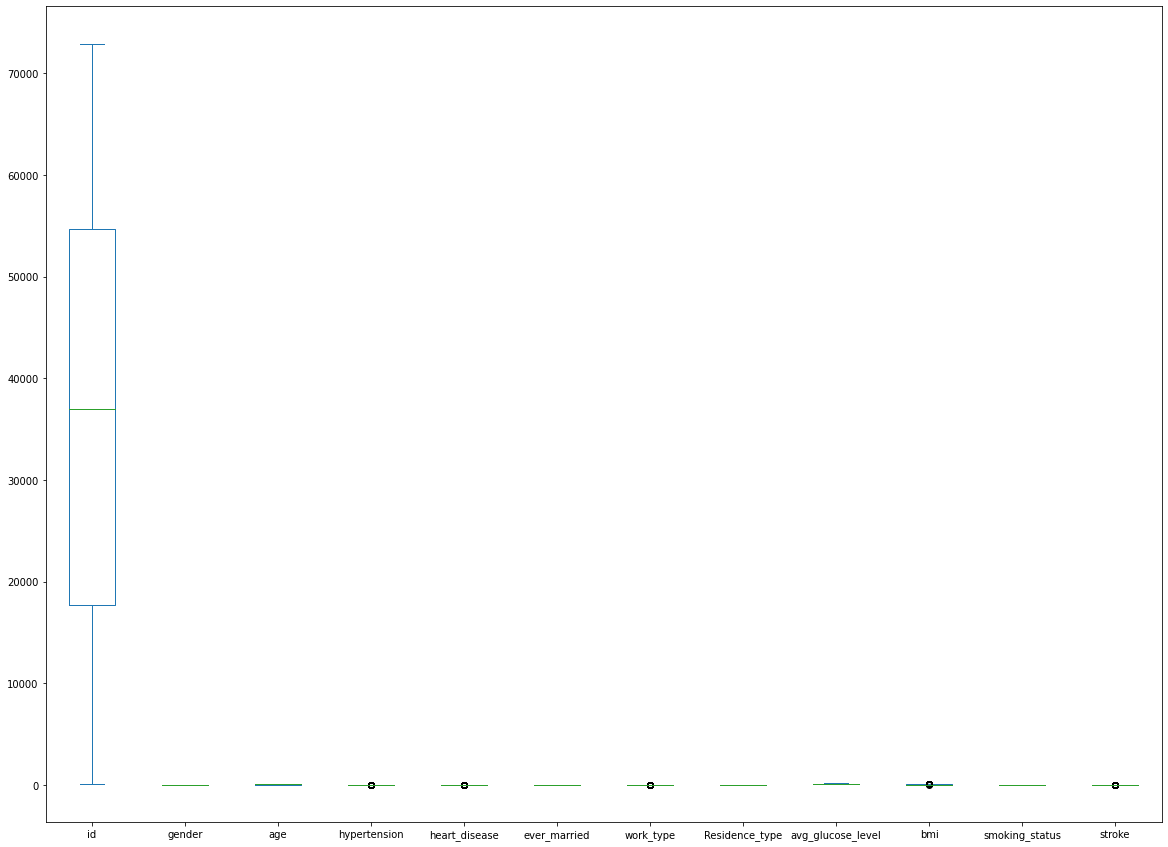

In [71]:
# outlier removal
df.plot(kind = 'box',figsize=(20,15))
plt.show()

### Correlation Analysis & Feature Relationship

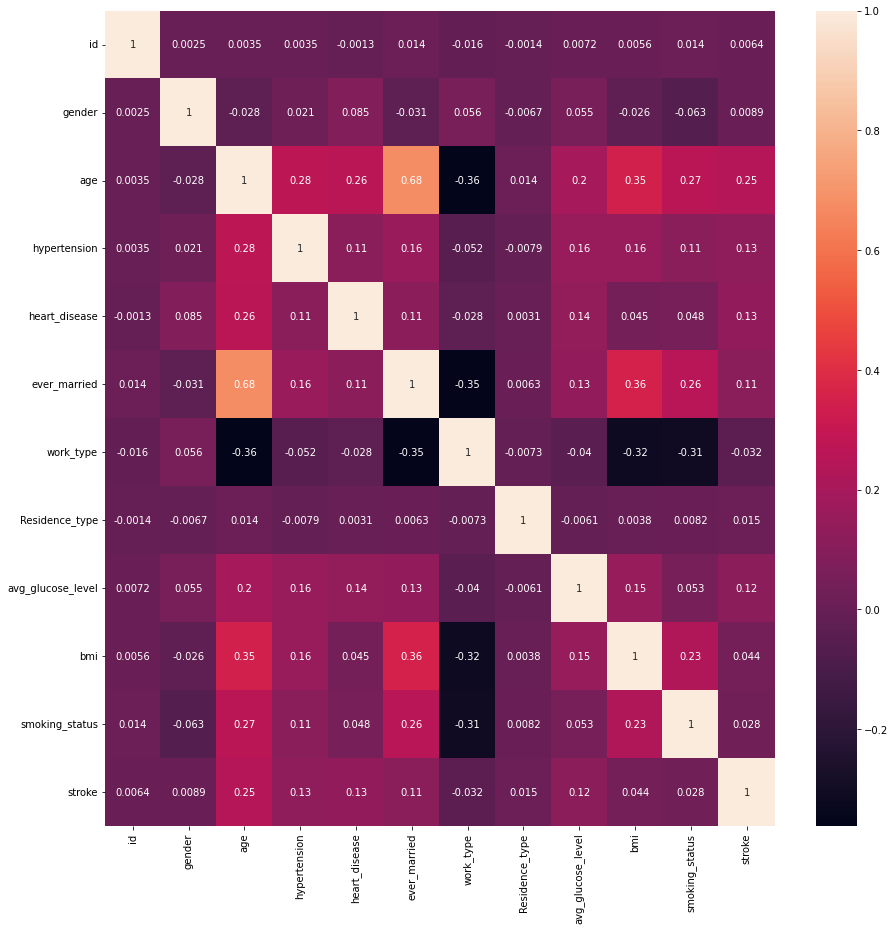

In [72]:
plt.figure(figsize=(15, 15))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [73]:
# drop the id column
df.drop('id', axis = 1, inplace = True)

In [74]:
#### Remove The correlated
threshold=0.7

In [75]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [76]:
correlation(df.iloc[:,:-1],threshold)

set()

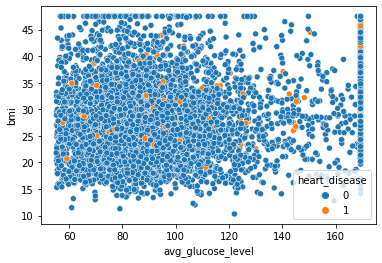

In [77]:
sns.scatterplot(data = df, x ='avg_glucose_level', y = 'bmi', hue = 'heart_disease')

### Split the dataset into dependent and independent features

In [78]:
X=df.drop('stroke',axis=1)

In [79]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,169.3575,36.600000,1
1,0,61.0,0,0,1,3,0,169.3575,28.743512,2
2,1,80.0,0,1,1,2,0,105.9200,32.500000,2
3,0,49.0,0,0,1,2,1,169.3575,34.400000,3
4,0,79.0,1,0,1,3,0,169.3575,24.000000,2


In [80]:
y=df['stroke']

In [81]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

### Feature Importance

In [82]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [83]:
print(selection.feature_importances_)

[0.05265674 0.24606851 0.02754495 0.02216541 0.02238632 0.0688544
 0.05615328 0.17934828 0.22378588 0.10103623]


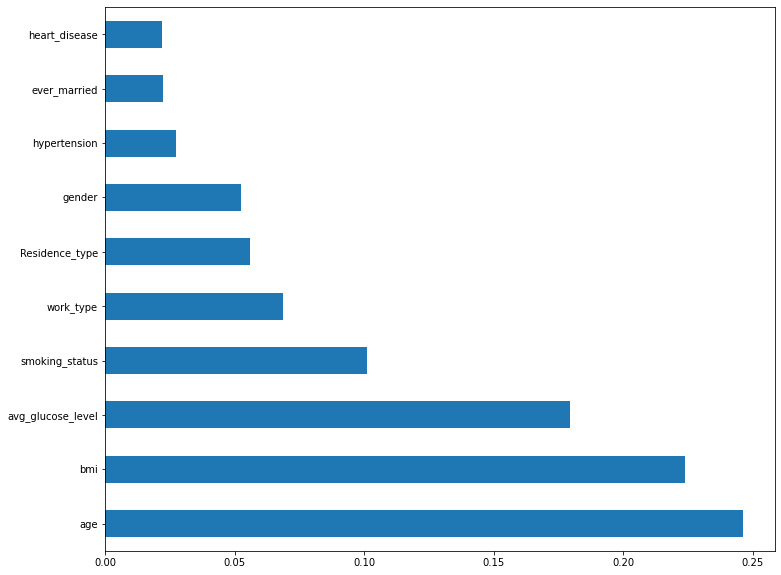

In [84]:
plt.figure(figsize=(12, 10))
feature_imp = pd.Series(selection.feature_importances_, index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

In [85]:
from sklearn.feature_selection import mutual_info_classif

In [86]:
mutual_info=mutual_info_classif(X,y)

In [87]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

age                  0.043857
avg_glucose_level    0.008366
gender               0.006915
ever_married         0.004635
bmi                  0.004564
work_type            0.003562
hypertension         0.003109
heart_disease        0.003053
Residence_type       0.003049
smoking_status       0.002105
dtype: float64

### Split Dataset into Train and Test Set

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [89]:
X_train.shape

(4088, 10)

In [90]:
y_train.shape

(4088,)

In [91]:
X_test.shape

(1022, 10)

In [92]:
y_test.shape

(1022,)

### Imbalance Dataset

##### Dealing with Categorical Features

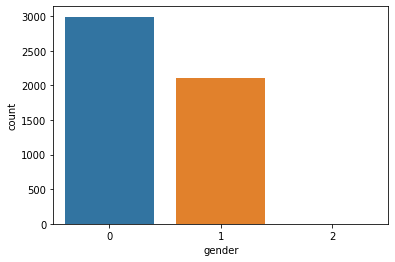

In [93]:
sns.countplot(x = "gender", data= df)
plt.show()

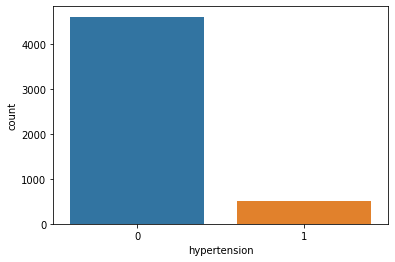

In [94]:
sns.countplot(x = "hypertension", data= df)
plt.show()

In [95]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [96]:
from collections import Counter

In [97]:
from imblearn.combine import SMOTETomek

In [98]:
print("The number of classes before fit: {}".format( y_train.value_counts()))

The number of classes before fit: 0    3899
1     189
Name: stroke, dtype: int64


In [99]:
#os = SMOTETomek(0.5)
#X_train, y_train = os.fit_resample(X_trXain, y_train)
#print("The number of classes after fit {}".format((( y_train.value_counts()))))

In [100]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data

smote = SMOTE(random_state = 1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
#Creating a new Oversampling Data Frame
#df_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
#df_oversampler['Exited']
#sns.countplot(df_oversampler['Exited'])

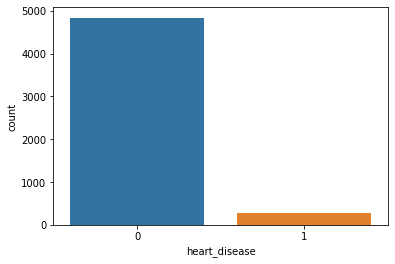

In [101]:
sns.countplot(x = "heart_disease", data= df)
plt.show()

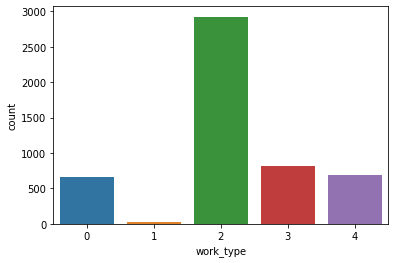

In [102]:

sns.countplot(x = "work_type", data= df)
plt.show()

In [103]:
#!pip install imblearn

In [104]:
#y_train.value_counts()

### Dimensionality Reduction

In [105]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,169.3575,36.600000,1
1,0,61.0,0,0,1,3,0,169.3575,28.743512,2
2,1,80.0,0,1,1,2,0,105.9200,32.500000,2
3,0,49.0,0,0,1,2,1,169.3575,34.400000,3
4,0,79.0,1,0,1,3,0,169.3575,24.000000,2


In [106]:
# drop the residence type column
#X.drop('Residence_type', axis = 1, inplace = True)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,169.3575,36.600000,1
1,0,61.0,0,0,1,3,0,169.3575,28.743512,2
2,1,80.0,0,1,1,2,0,105.9200,32.500000,2
3,0,49.0,0,0,1,2,1,169.3575,34.400000,3
4,0,79.0,1,0,1,3,0,169.3575,24.000000,2


In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [108]:
print(abs( pca.components_ ))

[[5.72304284e-04 2.40098973e-01 1.71936149e-03 1.17242080e-03
  3.50588907e-03 3.14003517e-03 2.62833685e-04 9.69623287e-01
  4.63185367e-02 3.29839120e-03]
 [1.01288732e-03 9.63360245e-01 2.95535674e-03 2.25745291e-03
  1.39729129e-02 1.85110754e-02 6.02478174e-04 2.43886158e-01
  1.08404366e-01 1.23269072e-02]
 [2.52787124e-03 1.17402945e-01 2.10235143e-03 2.31233104e-03
  7.52021988e-03 3.36335535e-02 9.16748918e-05 1.85372403e-02
  9.91976976e-01 2.55081165e-02]
 [3.22244746e-02 1.74275178e-02 3.52112376e-03 1.02279116e-02
  4.45804679e-02 6.45242830e-01 2.13979306e-03 1.61317489e-03
  4.39009113e-02 7.60447670e-01]
 [3.68865226e-03 5.04682415e-03 2.69149443e-02 1.30237447e-02
  2.07168373e-02 7.60765263e-01 4.71102890e-03 1.45224678e-03
  9.84461485e-03 6.47883245e-01]
 [2.17682671e-01 1.32974003e-04 1.65185930e-02 1.36160364e-02
  1.63554293e-02 9.91503519e-03 9.75592945e-01 5.78000652e-04
  1.12630507e-04 2.86825877e-03]
 [9.73920624e-01 2.48900811e-04 1.51666698e-02 4.95988284e

featue : 

In [128]:
X_train.shape

(4088, 7)

In [110]:
X_test.shape

(1022, 7)

In [123]:
# number of components
n_pcs= pca.components_.shape[0]
n_pcs

7

In [124]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important

[7, 1, 8, 9, 5, 6, 0]

In [138]:
df.iloc[:,0:1]

,gender
0,1
1,0
2,1
3,0
4,0
...,...
5105,0
5106,0
5107,0
5108,1


In [144]:
initial_feature_names = ['gender',	'age',	'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type'	,'avg_glucose_level'	,'bmi',	'smoking_status']

In [145]:
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


In [146]:
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

In [147]:
# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [148]:
df

,0,1
0,PC1,avg_glucose_level
1,PC2,age
2,PC3,bmi
3,PC4,smoking_status
4,PC5,work_type
5,PC6,Residence_type
6,PC7,gender


### Scale Dataset

In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [150]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
X_train

array([[-0.68768502, -0.82129069, -0.24827253, ..., -1.97332854,
         1.27858468,  0.98104023],
       [ 2.03882354,  0.27268272, -1.35477311, ...,  1.51737058,
        -0.73023802,  1.3689981 ],
       [ 1.89115685,  1.19553307, -0.88911634, ..., -0.0700724 ,
         0.74003848, -1.1418815 ],
       ...,
       [-0.77019294,  0.22744757,  1.30403223, ..., -0.3422951 ,
         0.84966571, -0.97183086],
       [ 2.00240753,  0.58924248,  2.57696508, ..., -1.12348034,
         0.75421492, -1.0439998 ],
       [ 2.15349854, -0.3811458 ,  0.93536306, ...,  1.00465356,
         0.74127905, -1.20869894]])

#### Save Scaler Object

In [114]:
import pickle
import os

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:

#scaler_path = '/content/drive/MyDrive/scaler.pkl'
#with open(scaler_path,'wb') as scaler_file:
    #pickle.dump(sc,scaler_file)

## Training

#### Logistic Regresion

In [152]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [153]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [154]:
y_train_pred_log  = log_classifier.predict(X_train)

In [155]:
accuracy_score(y_train, y_train_pred_log)

0.9537671232876712

In [156]:
X_train

array([[-0.68768502, -0.82129069, -0.24827253, ..., -1.97332854,
         1.27858468,  0.98104023],
       [ 2.03882354,  0.27268272, -1.35477311, ...,  1.51737058,
        -0.73023802,  1.3689981 ],
       [ 1.89115685,  1.19553307, -0.88911634, ..., -0.0700724 ,
         0.74003848, -1.1418815 ],
       ...,
       [-0.77019294,  0.22744757,  1.30403223, ..., -0.3422951 ,
         0.84966571, -0.97183086],
       [ 2.00240753,  0.58924248,  2.57696508, ..., -1.12348034,
         0.75421492, -1.0439998 ],
       [ 2.15349854, -0.3811458 ,  0.93536306, ...,  1.00465356,
         0.74127905, -1.20869894]])

##### Evaluate Model

In [157]:
print(log_classifier.predict(sc.transform([[169.357,67,36.600000,1,2,1,1]])))

[1]


In [158]:
y_pred_log = log_classifier.predict(X_test)

In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_log)
print(cm)
print(classification_report(y_test, y_pred_log))
log_acc = accuracy_score(y_test, y_pred_log)
log_acc

[[962   0]
 [ 60   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9412915851272016

In [160]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

##### Evaluate Model

In [162]:
print(knn_classifier.predict(sc.transform([[169.357,67,36.600000,1,2,1,1]])))

[0]


##### Training Accuracy

In [164]:
y_train_pred_knn  = knn_classifier.predict(X_train)

In [165]:
accuracy_score(y_train, y_train_pred_knn)

0.9540117416829745

##### Test Accuracy

In [166]:
y_pred_knn = knn_classifier.predict(X_test)

In [167]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_acc

[[961   1]
 [ 60   0]]


0.9403131115459883

In [168]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022



#### Support Vector Machine(Classifier)

In [169]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [171]:
print(svm_classifier.predict([[169.357,67,36.600000,1,2,1,1]]))

[0]


##### Evaluate Model

##### Training Accuracy

In [172]:
y_train_pred_svm  = svm_classifier.predict(X_train)

In [173]:
accuracy_score(y_train, y_train_pred_svm)

0.9537671232876712

##### Test Accuracy

In [174]:
y_pred_svm = svm_classifier.predict(X_test)

In [175]:
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_acc

[[962   0]
 [ 60   0]]


0.9412915851272016

#### SVM(Kernel)

In [176]:
from sklearn.svm import SVC
kernel_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [177]:
print(kernel_classifier.predict([[169.357,67,36.600000,1,2,1,1]]))

[0]


##### Evaluate Model

In [179]:
print(kernel_classifier.predict(sc.transform([[169.357,67,36.600000,1,2,1,1]])))

[0]


In [180]:
y_pred_kernel = kernel_classifier.predict(X_test)

In [181]:
cm = confusion_matrix(y_test, y_pred_kernel)
print(cm)
kernel_acc = accuracy_score(y_test, y_pred_kernel)
kernel_acc

[[962   0]
 [ 60   0]]


0.9412915851272016

#### Naive Bayes

In [182]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

##### Evaluate Model

In [183]:
print(nb_classifier.predict(sc.transform([[169.357,67,36.600000,1,2,1,1]])))

[1]


In [184]:
y_pred = nb_classifier.predict(X_test)

In [185]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
nb_acc = accuracy_score(y_test, y_pred)
nb_acc

[[961   1]
 [ 60   0]]


0.9403131115459883

#### Decision Tree 

In [186]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

##### Evaluate Model

In [187]:
print(dt_classifier.predict(sc.transform([[169.357,67,36.600000,1,2,1,1]])))

[0]


In [188]:
y_pred = dt_classifier.predict(X_test)

In [189]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt_acc = accuracy_score(y_test, y_pred)
dt_acc

[[916  46]
 [ 55   5]]


0.901174168297456

#### Random Forest Tree

In [190]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

##### Evaluate Model

In [191]:
print(rf_classifier.predict(sc.transform([[169.357,67,36.600000,1,2,1,1]])))

[0]


In [192]:
y_pred = rf_classifier.predict(X_test)

In [193]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
rf_acc = accuracy_score(y_test, y_pred)
rf_acc

[[958   4]
 [ 60   0]]


0.9373776908023483

### Overall Performance Visualization

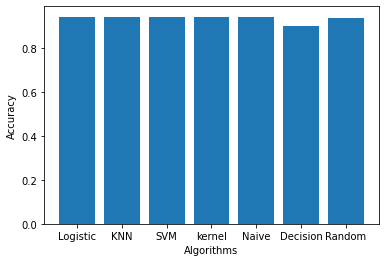

In [194]:
plt.bar(['Logistic','KNN','SVM','kernel','Naive','Decision','Random'],[log_acc,knn_acc,svm_acc, kernel_acc,nb_acc,dt_acc, rf_acc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

## Save Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [196]:
import pickle
file = open('/content/drive/MyDrive/Data/stroke_model.pkl', 'wb')

pickle.dump(svm_classifier, file)